# Hierarchical Clustering and DB Scan  

* Gather points closets
* Merge them into their "average point"
* repeat until you get the number of clusters you want.

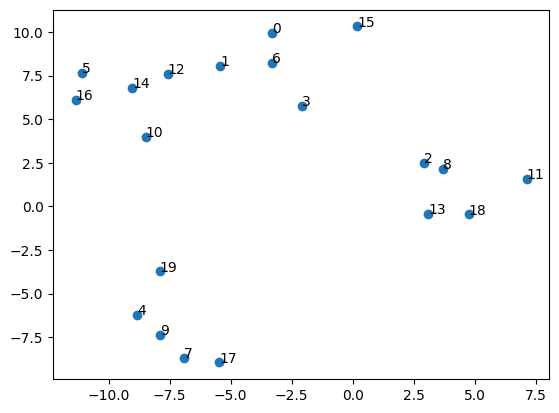

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=20, centers=4, n_features=2, cluster_std=1.7, random_state=42)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
for i,txt in enumerate(range(20)):
    ax.annotate(txt, (X[i,0], X[i,1]))

## Algorithm  
1. Connect the two closest points to each other together (makes first cluster)  
    * In a dendogram, this is the first bracket whose height is their distance.  
2. Do the same with the next two points, combining...
    * points to points
    * points to clusters
    * or clusters to clusters
3. Continue until all points are combined into one cluster
4. Determine in the dendogram where to stop the clustering (number of clusters)

Text(0, 0.5, 'Distance')

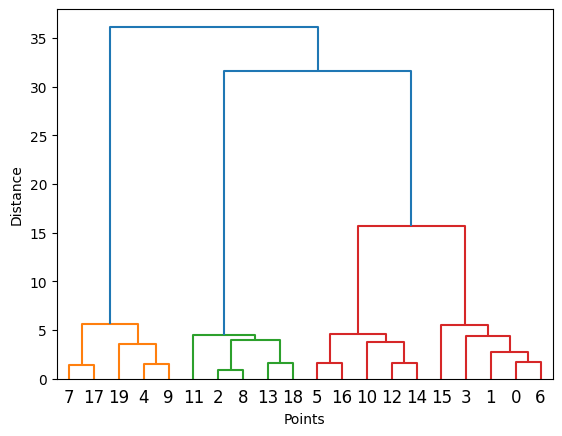

In [2]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.xlabel('Points')
plt.ylabel('Distance') # height of the bracket represents the distance between the two points


From the dendograph, we can see that around 5, there seems to be a natural break. Maybe a max distance of 10 and call it good. 

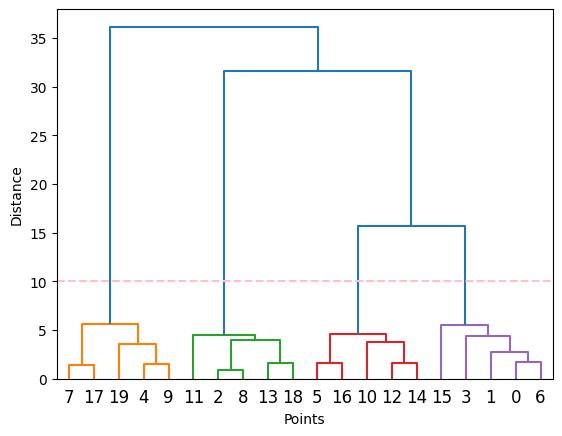

In [3]:
import scipy.cluster.hierarchy as sch

limit = 10

dendogram = sch.dendrogram(sch.linkage(X, method='ward'), color_threshold=limit)
plt.xlabel('Points')
plt.ylabel('Distance') # height of the bracket represents the distance between the two points

plt.axhline(y=limit, color='pink', linestyle='--')

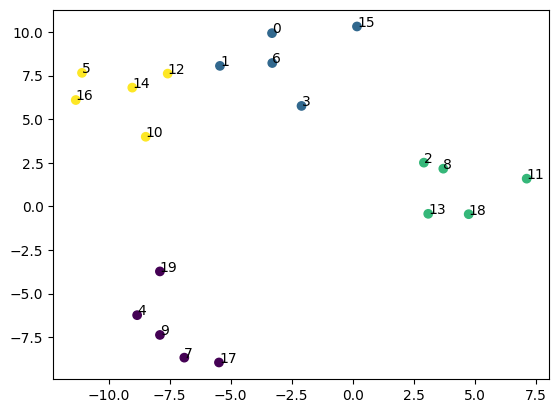

In [4]:
# make the model

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4,         # how many clusters you need? (found in dendograph)
                                  metric='euclidean',   # how are you going to measure the distance? (l2 norm)
                                  linkage='ward')       # the criterian, ward minimizes variance of clusters. Also can you average.

y_pred = cluster.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y_pred)
for i,txt in enumerate(range(20)):
    ax.annotate(txt, (X[i,0], X[i,1]))

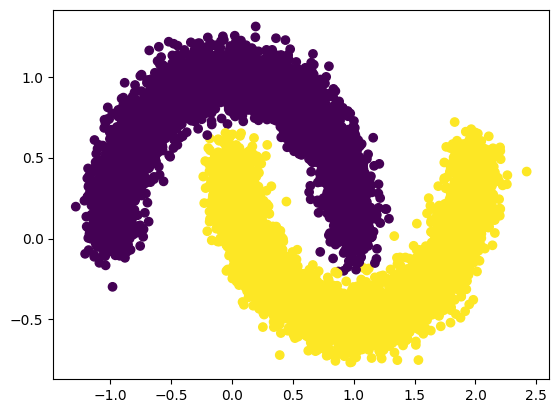

In [5]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=10000, noise=0.1, random_state=2)

plt.scatter(X[:,0], X[:,1], c=y)

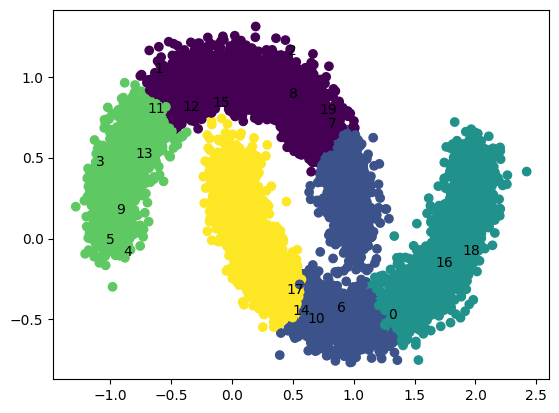

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5,         # how many clusters you need? (found in dendograph)
                                  metric='euclidean',   # how are you going to measure the distance? (l2 norm)
                                  linkage='ward')       # the criterian, ward minimizes variance of clusters. Also can you average.

y_pred = cluster.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y_pred)
for i,txt in enumerate(range(20)):
    ax.annotate(txt, (X[i,0], X[i,1]))